In [1]:
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [2]:
Datadir = 'D:/FAST_NUCES/7thSemester/DLP/Assignment/Assignment2/Dataset/SamsungDataset/005930.KS.csv'
df = pd.read_csv(Datadir)


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,57000.0,57500.0,56700.0,57500.0,56531.605469,16944503
1,2022-10-25,57000.0,58600.0,57000.0,57700.0,56728.242188,17405678
2,2022-10-26,58000.0,59600.0,57700.0,59400.0,58399.609375,20824967
3,2022-10-27,59700.0,60100.0,58900.0,59500.0,58497.925781,21756712
4,2022-10-28,58900.0,59200.0,57200.0,57300.0,56334.976563,20924937
...,...,...,...,...,...,...,...
241,2023-10-16,67900.0,68500.0,66800.0,67300.0,67300.000000,12599299
242,2023-10-17,67700.0,69900.0,67400.0,69400.0,69400.000000,17299253
243,2023-10-18,68900.0,70500.0,68800.0,70500.0,70500.000000,16493184
244,2023-10-19,69700.0,70000.0,69400.0,69500.0,69500.000000,13985012


In [4]:
# Display a summary of the data
summary = df.describe()
print("Data Summary:")
print(summary)

Data Summary:
               Open          High           Low         Close     Adj Close  \
count    246.000000    246.000000    246.000000    246.000000    246.000000   
mean   65156.504065  65644.308943  64578.861789  65104.065041  64662.911967   
std     4697.426388   4682.798323   4647.935720   4662.405412   4968.096798   
min    55400.000000  56000.000000  54500.000000  55300.000000  54708.589844   
25%    61100.000000  61500.000000  60500.000000  61000.000000  60199.234375   
50%    65050.000000  65450.000000  64450.000000  65000.000000  64677.234375   
75%    69800.000000  70275.000000  68775.000000  69500.000000  69500.000000   
max    73400.000000  73600.000000  72900.000000  73400.000000  73400.000000   

             Volume  
count  2.460000e+02  
mean   1.228234e+07  
std    5.659243e+06  
min    2.861300e+04  
25%    9.783544e+06  
50%    1.231068e+07  
75%    1.501417e+07  
max    3.001622e+07  


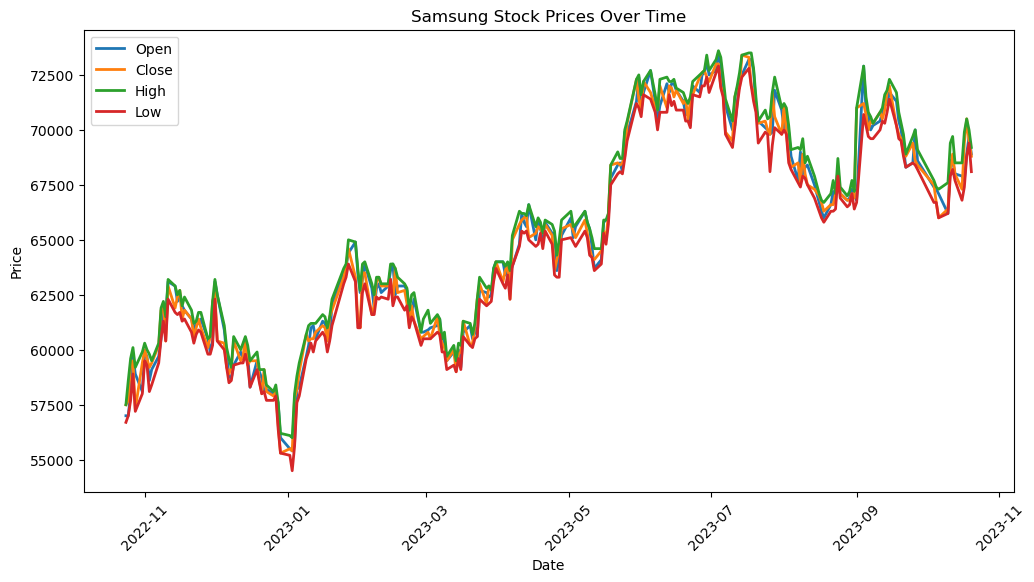

In [5]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for the DataFrame
df.set_index('Date', inplace=True)

# Create a plot with Open, Close, High, and Low prices
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Open'], label='Open', linewidth=2)
plt.plot(df.index, df['Close'], label='Close', linewidth=2)
plt.plot(df.index, df['High'], label='High', linewidth=2)
plt.plot(df.index, df['Low'], label='Low', linewidth=2)

plt.title('Samsung Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

normalized_col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[normalized_col] = scaler.fit_transform(df[normalized_col])

# Define the sequence length
sequence_length = 10  # You can adjust this based on your needs

# Initialize empty lists for input sequences and target values
X = []
y = []

# Iterate through your dataset to create sequences
for i in range(len(df) - sequence_length):
    # Extract the input sequence (historical data)
    input_sequence = df.iloc[i:i + sequence_length][['Open', 'High', 'Low', 'Close', 'Volume']].values

    # Extract the target value (next day's Close price)
    target_value = df.iloc[i + sequence_length]['Close']

    X.append(input_sequence)
    y.append(target_value)


# Convert the sequences to NumPy arrays
X = np.array(X)
y = np.array(y)


In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(188, 10, 5)
(48, 10, 5)
(188,)
(48,)


**Model with no hyper parameter setting**

In [9]:
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 2s 71ms/step - loss: 0.1467 - val_loss: 0.0171
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0488
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.0300 - val_loss: 0.0110
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0103 - val_loss: 0.0110
Epoch 5/10
6/6 [==============================] - 0s 8ms/step -

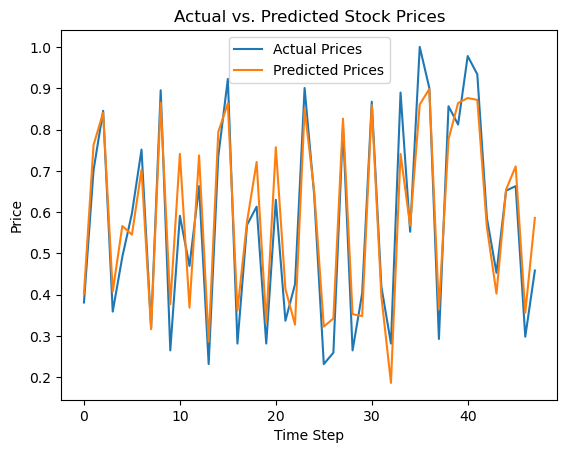

In [10]:
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title("Actual vs. Predicted Stock Prices")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.show()


**Creating Model For Hyper Parameter Trained Version**

In [11]:
def create_lstm_model(num_units):
    model = Sequential()
    model.add(LSTM(num_units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameters you want to search
param_grid = {
    'num_units': [50, 100],   # Experiment with different numbers of LSTM units
    'epochs': [10, 20],       # Experiment with different numbers of epochs
    'batch_size': [32, 64]    # Experiment with different batch sizes
}


**Implementing GridSearchCV**

In [17]:
# from sklearn.metrics import make_scorer, mean_squared_error
# from keras.wrappers.scikit_learn import KerasClassifier

# # Create a scoring function for mean squared error
# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# # Create a KerasClassifier based on your model function

# est = KerasClassifier(build_fn=create_lstm_model, verbose=0)
# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=est, param_grid=param_grid, scoring=mse_scorer, cv=3,verbose=2, n_jobs=-1)

# # Fit the GridSearchCV object on your data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

#Print the best parameters
print(f'Best parameters: {best_params}')

Best parameters: {'num_units': 100, 'epochs': 20, 'batch_size': 64}


In [16]:
best_params = {'num_units': 100, 'epochs': 20, 'batch_size': 64}

In [19]:
modl = create_lstm_model(100)
#modl.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
modl.fit(X_train, y_train, epochs=best_params['epochs'] , batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 2s 182ms/step - loss: 0.3622 - val_loss: 0.1387
Epoch 2/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0798 - val_loss: 0.0065
Epoch 3/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0208 - val_loss: 0.0737
Epoch 4/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0610 - val_loss: 0.0513
Epoch 5/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0298 - val_loss: 0.0106
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 7/20
3/3 [==============================] - 0s 19ms/step - loss: 0.0135 - val_loss: 0.0161
Epoch 8/20
3/3 [==============================] - 0s 24ms/step - loss: 0.0192 - val_loss: 0.0162
Epoch 9/20
3/3 [==============================] - 0s 20ms/step - loss: 0.0168 - val_loss: 0.0101
Epoch 10/20
3/3 [==============================] - 0s 21ms/step - loss: 0.0106 - val_loss: 0.0060
Epoch 11/20
3/3 [===========

In [33]:
# Use the best model for predictions
predictions = modl.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Best Model - Mean Squared Error:", mse)
print("Best Model - Root Mean Squared Error:", rmse)


2/2 [==============================] - 0s 2ms/step
Best Model - Mean Squared Error: 0.004002520059536998
Best Model - Root Mean Squared Error: 0.06326547288637774


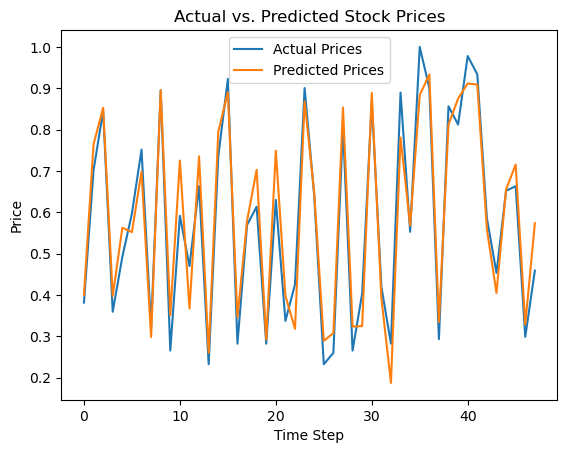

In [34]:
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title("Actual vs. Predicted Stock Prices")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.show()


In [20]:
modl.save('q2model.h5')